   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

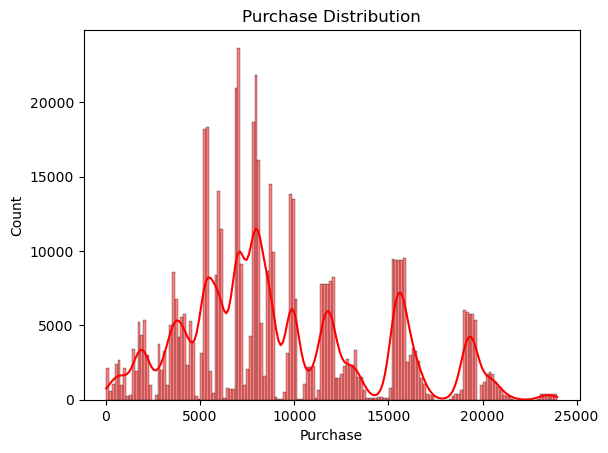

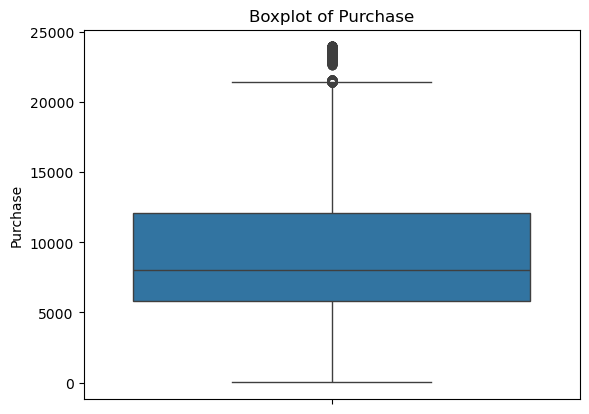

Skewness: 0.6001400037087128
Kurtosis: -0.3383775655851702
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


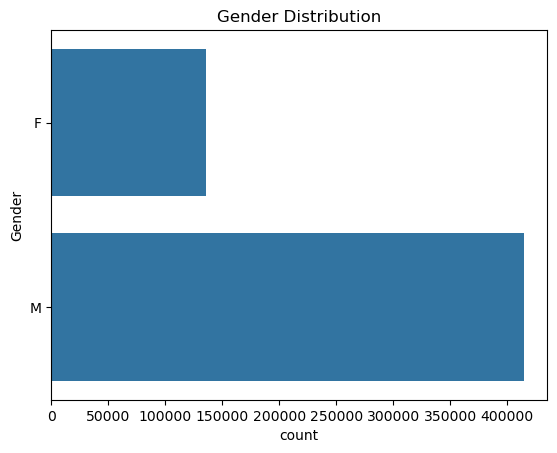

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from math import sqrt

# Load data
data = pd.read_csv("https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv")

# Exploratory Data Analysis
print(data.head())
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data.isnull().sum() / data.shape[0] * 100)
print(data.nunique())

# Visualizations
sns.histplot(data["Purchase"], kde=True, color='r')
plt.title("Purchase Distribution")
plt.show()

sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

print("Skewness:", data["Purchase"].skew())
print("Kurtosis:", data["Purchase"].kurtosis())
print(data["Purchase"].describe())

sns.countplot(data['Gender'])
plt.title("Gender Distribution")
plt.show()

print(data['Gender'].value_counts(normalize=True) * 100)
print(data.groupby("Gender").mean()["Purchase"])

sns.countplot(data['Marital_Status'])
plt.title("Marital Status Distribution")
plt.show()

print(data.groupby("Marital_Status").mean()["Purchase"])
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital Status and Purchase Analysis")
plt.show()

plt.figure(figsize=(18, 5))
sns.countplot(data['Occupation'])
plt.title("Occupation Distribution")
plt.show()

occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup.plot(kind='bar', figsize=(15, 5))
plt.title("Occupation and Purchase Analysis")
plt.show()

sns.countplot(data['City_Category'])
plt.title("City Category Distribution")
plt.show()

data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

sns.countplot(data['Stay_In_Current_City_Years'])
plt.title("Stay In Current City Years Distribution")
plt.show()

# Mean Purchase by Stay_In_Current_City_Years
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay In Current City Years and Purchase Analysis")
plt.show()

# Data Preprocessing
df = data.copy()

# Convert categorical variables to numerical
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])

# Fill NaN values for Product_Category_2 and Product_Category_3
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype('int64')

# Drop unnecessary columns
df = df.drop(["User _ID", "Product_ID"], axis=1)

# Define features and target variable
X = df.drop("Purchase", axis=1)
y = df['Purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression Model
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_lr)))

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)